In [1]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# y = w * x + b 함수
def myfunc(_x):
  w = 2.3 # 기울기
  b = 3.6 # y 절편.  점(0, 2.6)
  # x 절편은 점(-2, 0)이 됨.
  _y = w * _x + b
  noise = random.random() * 0.2 # Noise
  return _y + noise

In [3]:
# random.random() -- 0.0 ~ 1.0
NUM_DATA = 20          # 데이터 갯수
XVALUE = 5              # X값의 범위 (0.0 ~ 5.0)
# type: python list
xtrain = [random.random() * XVALUE for i in range(NUM_DATA)]
xtrain.sort()            # sorting

In [4]:
ytrain = [myfunc(x) for x in xtrain]
print('xtrain :',xtrain[:3])
print('ytrain :',ytrain[:3])

xtrain : [0.19294160471897137, 0.3227016553754536, 0.8362411363577771]
ytrain : [4.118236127837006, 4.504877541968655, 5.545579986482405]


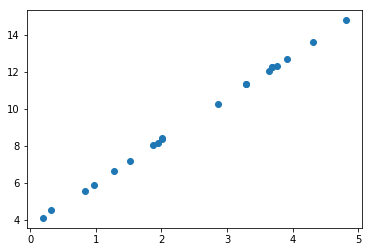

In [5]:
# actual data 산점도
fig, ax = plt.subplots()
ax.scatter(xtrain, ytrain, label='actual')
plt.show()

In [6]:
# type 변환 python list -> numpy ndarray
# type: numpy ndarray
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
print('xlist.shape :',xtrain.shape)  # shape ==  (10,)
print('ylist.shape :',ytrain.shape)  # shape ==  (10,)

xlist.shape : (20,)
ylist.shape : (20,)


In [7]:
# tensor 에 맞추기 위해 reshape
xtrain = xtrain.reshape((NUM_DATA, 1))  # shape ==  (10,1)
ytrain = ytrain.reshape((NUM_DATA, 1))  # shape ==  (10,1)
print('xlist.shape :', xtrain.shape)
print('ylist.shape :', ytrain.shape)

xlist.shape : (20, 1)
ylist.shape : (20, 1)


In [8]:
X = tf.placeholder(tf.float32, [None, 1])
Y = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([1,1], -1, 1), name='weight')
B = tf.Variable(tf.random_normal([1], -1, 1), name='bias')
Y2 = tf.matmul(X, W) + B   # [1,1]행렬 x [1,1]행렬 + [1]



In [9]:
# 손실 함수
cost_function = tf.reduce_mean(tf.square(Y2 - Y))
# 옵티마이저
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
#optimizer = tf.train.AdamOptimizer(learning_rate=0.1)
training = optimizer.minimize(cost_function)

In [10]:
# loss list
history = []           # Record loss values for plot

In [11]:
# Session 시작
import random
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(500):
  indx = list(range(NUM_DATA))
  random.shuffle(indx)  
  for j in range(NUM_DATA):
    x_one = xtrain[indx[j]].reshape(1,1)
    y_one = ytrain[indx[j]].reshape(1,1)
    res,cost = sess.run([training, cost_function],
                        feed_dict={X: xtrain, Y:ytrain})
    y2, w, b = sess.run([Y2, W, B], feed_dict={X: xtrain, Y: ytrain})
    print('[%04d]' % i, 'LOSS', cost, 'W', w, 'bias', b)

  history.append(cost)

[0000] LOSS 230.558 W [[ 7.14112854]] bias [ 1.57511401]
[0000] LOSS 143.462 W [[ 0.33165503]] bias [-0.43306208]
[0000] LOSS 89.5082 W [[ 5.61326885]] bias [ 1.38246143]
[0000] LOSS 56.0655 W [[ 1.38708448]] bias [ 0.18063343]
[0000] LOSS 35.3186 W [[ 4.64265919]] bias [ 1.34301758]
[0000] LOSS 22.4315 W [[ 2.01588917]] bias [ 0.6368531]
[0000] LOSS 14.4115 W [[ 4.01886225]] bias [ 1.3919909]
[0000] LOSS 9.40681 W [[ 2.38266182]] bias [ 0.98951763]
[0000] LOSS 6.27111 W [[ 3.61151171]] bias [ 1.48980284]
[0000] LOSS 4.29497 W [[ 2.58908749]] bias [ 1.27247906]
[0000] LOSS 3.03918 W [[ 3.33979464]] bias [ 1.61243391]
[0000] LOSS 2.23173 W [[ 2.69794154]] bias [ 1.50713384]
[0000] LOSS 1.70413 W [[ 3.1535728]] bias [ 1.74545372]
[0000] LOSS 1.35192 W [[ 2.74793291]] bias [ 1.70713449]
[0000] LOSS 1.11029 W [[ 3.02169776]] bias [ 1.88033128]
[0000] LOSS 0.938983 W [[ 2.76289225]] bias [ 1.88130963]
[0000] LOSS 0.812925 W [[ 2.92478108]] bias [ 2.01215363]
[0000] LOSS 0.716471 W [[ 2.7574

[0007] LOSS 0.00307017 W [[ 2.3079567]] bias [ 3.67691374]
[0007] LOSS 0.00306875 W [[ 2.30784631]] bias [ 3.67726231]
[0007] LOSS 0.00306742 W [[ 2.30774045]] bias [ 3.67759657]
[0007] LOSS 0.00306622 W [[ 2.30763888]] bias [ 3.67791724]
[0007] LOSS 0.00306511 W [[ 2.30754137]] bias [ 3.6782248]
[0007] LOSS 0.00306409 W [[ 2.30744815]] bias [ 3.67851996]
[0007] LOSS 0.00306315 W [[ 2.30735826]] bias [ 3.67880297]
[0007] LOSS 0.00306229 W [[ 2.30727243]] bias [ 3.67907453]
[0007] LOSS 0.00306148 W [[ 2.30718994]] bias [ 3.67933488]
[0007] LOSS 0.00306076 W [[ 2.30711079]] bias [ 3.6795845]
[0007] LOSS 0.00306009 W [[ 2.30703497]] bias [ 3.67982411]
[0007] LOSS 0.00305948 W [[ 2.30696225]] bias [ 3.68005395]
[0007] LOSS 0.0030589 W [[ 2.30689216]] bias [ 3.68027425]
[0007] LOSS 0.00305838 W [[ 2.30682564]] bias [ 3.68048573]
[0007] LOSS 0.0030579 W [[ 2.30676103]] bias [ 3.68068838]
[0007] LOSS 0.00305745 W [[ 2.30669975]] bias [ 3.68088293]
[0007] LOSS 0.00305706 W [[ 2.30664015]] bias

[0016] LOSS 0.00305236 W [[ 2.30525279]] bias [ 3.68545008]
[0016] LOSS 0.00305235 W [[ 2.30525303]] bias [ 3.68545032]
[0016] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545032]
[0016] LOSS 0.00305236 W [[ 2.30525303]] bias [ 3.68545055]
[0017] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545055]
[0017] LOSS 0.00305236 W [[ 2.30525303]] bias [ 3.68545079]
[0017] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545079]
[0017] LOSS 0.00305236 W [[ 2.30525279]] bias [ 3.68545103]
[0017] LOSS 0.00305236 W [[ 2.30525255]] bias [ 3.68545103]
[0017] LOSS 0.00305235 W [[ 2.30525279]] bias [ 3.68545127]
[0017] LOSS 0.00305235 W [[ 2.30525231]] bias [ 3.68545127]
[0017] LOSS 0.00305236 W [[ 2.30525255]] bias [ 3.68545151]
[0017] LOSS 0.00305235 W [[ 2.30525231]] bias [ 3.68545151]
[0017] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0017] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0017] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0017] LOSS 0.00305236 W [[ 2.30525231]]

[0026] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0026] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0026] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0026] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0026] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0026] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0026] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0026] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0026] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0026] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0026] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0026] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0026] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0026] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0026] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0027] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0027] LOSS 0.00305235 W [[ 2.30525255]]

[0035] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0036] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0036] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0036] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0036] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0036] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0036] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0036] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0036] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0036] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0036] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0036] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0036] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0036] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0036] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0036] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0036] LOSS 0.00305235 W [[ 2.30525255]]

[0045] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0045] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0045] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0045] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0045] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0045] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0046] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0046] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0046] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0046] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0046] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0046] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0046] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0046] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0046] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0046] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0046] LOSS 0.00305236 W [[ 2.30525231]]

[0055] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0055] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0055] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0055] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0055] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0055] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0055] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0055] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0056] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0056] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0056] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0056] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0056] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0056] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0056] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0056] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0056] LOSS 0.00305236 W [[ 2.30525231]]

[0063] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0063] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0063] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0063] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0063] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0063] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0063] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0063] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0063] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0064] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0064] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0064] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0064] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0064] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0064] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0064] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0064] LOSS 0.00305235 W [[ 2.30525255]]

[0071] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0071] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0072] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0072] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0072] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0072] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0072] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0072] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0072] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0072] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0072] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0072] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0072] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0072] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0072] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0072] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0072] LOSS 0.00305236 W [[ 2.30525231]]

[0081] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0081] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0081] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0081] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0081] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0081] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0081] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0081] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0082] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0082] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0082] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0082] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0082] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0082] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0082] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0082] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0082] LOSS 0.00305236 W [[ 2.30525231]]

[0091] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0091] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0091] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0091] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0091] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0091] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0091] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0091] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0091] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0091] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0091] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0091] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0091] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0091] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0091] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0091] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0092] LOSS 0.00305236 W [[ 2.30525231]]

[0101] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0101] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0101] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0101] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0101] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0101] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0101] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0101] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0101] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0101] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0101] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0101] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0102] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0102] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0102] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0102] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0102] LOSS 0.00305236 W [[ 2.30525231]]

[0111] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0111] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0111] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0111] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0111] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0111] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0111] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0111] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0111] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0111] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0111] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0111] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0111] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0111] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0111] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0111] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0111] LOSS 0.00305235 W [[ 2.30525255]]

[0119] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0119] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0119] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0119] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0119] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0119] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0119] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0119] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0119] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0119] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0119] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0120] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0120] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0120] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0120] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0120] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0120] LOSS 0.00305235 W [[ 2.30525255]]

[0129] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0129] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0129] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0129] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0129] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0129] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0129] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0129] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0129] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0129] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0129] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0129] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0129] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0129] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0129] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0129] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0129] LOSS 0.00305236 W [[ 2.30525231]]

[0138] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0138] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0138] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0138] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0138] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0138] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0139] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0139] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0139] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0139] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0139] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0139] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0139] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0139] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0139] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0139] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0139] LOSS 0.00305236 W [[ 2.30525231]]

[0147] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0147] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0147] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0147] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0147] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0147] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0147] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0147] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0147] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0147] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0147] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0147] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0147] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0147] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0147] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0147] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0148] LOSS 0.00305236 W [[ 2.30525231]]

[0156] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0156] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0156] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0156] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0156] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0156] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0156] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0156] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0156] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0156] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0156] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0156] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0156] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0156] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0156] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0156] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0157] LOSS 0.00305236 W [[ 2.30525231]]

[0164] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0164] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0164] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0164] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0164] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0164] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0164] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0164] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0165] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0165] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0165] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0165] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0165] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0165] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0165] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0165] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0165] LOSS 0.00305236 W [[ 2.30525231]]

[0174] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0174] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0174] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0174] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0174] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0174] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0174] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0174] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0174] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0174] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0174] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0174] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0174] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0174] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0174] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0174] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0174] LOSS 0.00305235 W [[ 2.30525255]]

[0182] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0182] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0182] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0183] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0183] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0183] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0183] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0183] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0183] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0183] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0183] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0183] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0183] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0183] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0183] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0183] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0183] LOSS 0.00305235 W [[ 2.30525255]]

[0191] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0191] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0192] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0192] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0192] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0192] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0192] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0192] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0192] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0192] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0192] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0192] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0192] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0192] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0192] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0192] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0192] LOSS 0.00305236 W [[ 2.30525231]]

[0201] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0201] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0201] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0201] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0201] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0201] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0201] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0201] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0201] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0201] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0201] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0201] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0201] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0201] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0201] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0201] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0201] LOSS 0.00305235 W [[ 2.30525255]]

[0210] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0210] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0210] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0210] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0210] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0210] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0210] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0210] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0210] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0211] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0211] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0211] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0211] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0211] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0211] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0211] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0211] LOSS 0.00305235 W [[ 2.30525255]]

[0217] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0217] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0217] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0217] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0217] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0217] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0217] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0217] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0217] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0217] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0217] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0218] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0218] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0218] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0218] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0218] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0218] LOSS 0.00305235 W [[ 2.30525255]]

[0227] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0227] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0227] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0227] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0227] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0227] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0227] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0227] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0227] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0227] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0227] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0227] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0227] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0227] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0227] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0227] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0228] LOSS 0.00305236 W [[ 2.30525231]]

[0237] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0237] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0237] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0237] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0237] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0237] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0237] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0237] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0237] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0237] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0237] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0237] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0237] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0237] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0237] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0237] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0237] LOSS 0.00305236 W [[ 2.30525231]]

[0246] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0246] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0246] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0246] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0246] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0246] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0246] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0246] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0246] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0246] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0246] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0246] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0246] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0246] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0246] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0246] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0246] LOSS 0.00305235 W [[ 2.30525255]]

[0253] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0254] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0254] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0254] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0254] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0254] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0254] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0254] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0254] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0254] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0254] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0254] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0254] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0254] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0254] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0254] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0254] LOSS 0.00305235 W [[ 2.30525255]]

[0263] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0263] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0263] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0263] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0263] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0263] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0263] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0263] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0263] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0263] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0264] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0264] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0264] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0264] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0264] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0264] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0264] LOSS 0.00305236 W [[ 2.30525231]]

[0273] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0273] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0273] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0273] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0273] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0273] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0273] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0273] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0273] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0273] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0274] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0274] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0274] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0274] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0274] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0274] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0274] LOSS 0.00305236 W [[ 2.30525231]]

[0283] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0283] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0283] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0283] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0283] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0283] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0283] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0283] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0283] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0283] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0283] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0283] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0283] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0283] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0283] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0283] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0283] LOSS 0.00305236 W [[ 2.30525231]]

[0292] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0292] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0292] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0292] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0292] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0292] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0292] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0292] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0292] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0292] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0292] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0292] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0293] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0293] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0293] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0293] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0293] LOSS 0.00305236 W [[ 2.30525231]]

[0302] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0302] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0302] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0302] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0302] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0302] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0302] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0302] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0302] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0302] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0302] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0302] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0302] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0302] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0302] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0302] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0302] LOSS 0.00305235 W [[ 2.30525255]]

[0311] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0311] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0312] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0312] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0312] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0312] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0312] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0312] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0312] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0312] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0312] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0312] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0312] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0312] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0312] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0312] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0312] LOSS 0.00305236 W [[ 2.30525231]]

[0321] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0321] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0321] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0321] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0321] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0321] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0321] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0321] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0322] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0322] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0322] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0322] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0322] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0322] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0322] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0322] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0322] LOSS 0.00305236 W [[ 2.30525231]]

[0330] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0330] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0330] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0330] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0330] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0330] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0330] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0330] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0330] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0330] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0330] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0330] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0330] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0330] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0330] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0330] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0330] LOSS 0.00305236 W [[ 2.30525231]]

[0339] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0339] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0339] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0339] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0339] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0339] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0339] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0339] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0339] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0339] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0339] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0339] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0339] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0339] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0340] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0340] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0340] LOSS 0.00305236 W [[ 2.30525231]]

[0348] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0348] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0348] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0348] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0348] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0348] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0348] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0348] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0348] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0348] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0348] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0349] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0349] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0349] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0349] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0349] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0349] LOSS 0.00305235 W [[ 2.30525255]]

[0357] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0357] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0357] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0357] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0357] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0357] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0357] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0357] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0357] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0358] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0358] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0358] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0358] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0358] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0358] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0358] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0358] LOSS 0.00305235 W [[ 2.30525255]]

[0366] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0366] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0366] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0366] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0366] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0366] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0366] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0366] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0366] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0366] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0366] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0366] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0366] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0366] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0366] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0366] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0366] LOSS 0.00305236 W [[ 2.30525231]]

[0373] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0373] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0373] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0373] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0373] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0373] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0374] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0374] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0374] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0374] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0374] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0374] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0374] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0374] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0374] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0374] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0374] LOSS 0.00305236 W [[ 2.30525231]]

[0382] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0382] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0382] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0382] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0382] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0382] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0382] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0382] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0382] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0383] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0383] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0383] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0383] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0383] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0383] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0383] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0383] LOSS 0.00305235 W [[ 2.30525255]]

[0392] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0392] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0392] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0392] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0392] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0392] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0392] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0392] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0392] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0392] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0392] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0392] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0392] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0392] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0392] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0392] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0393] LOSS 0.00305236 W [[ 2.30525231]]

[0401] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0401] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0401] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0401] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0401] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0401] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0401] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0401] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0401] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0401] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0401] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0401] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0401] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0401] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0401] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0402] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0402] LOSS 0.00305235 W [[ 2.30525255]]

[0409] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0409] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0409] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0409] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0409] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0409] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0409] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0409] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0409] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0409] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0410] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0410] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0410] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0410] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0410] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0410] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0410] LOSS 0.00305236 W [[ 2.30525231]]

[0418] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0418] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0418] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0418] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0418] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0418] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0418] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0418] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0418] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0418] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0418] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0418] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0418] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0418] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0418] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0418] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0419] LOSS 0.00305236 W [[ 2.30525231]]

[0426] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0426] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0426] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0427] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0427] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0427] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0427] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0427] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0427] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0427] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0427] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0427] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0427] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0427] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0427] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0427] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0427] LOSS 0.00305235 W [[ 2.30525255]]

[0436] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0436] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0436] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0436] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0436] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0436] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0436] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0436] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0436] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0436] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0436] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0436] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0436] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0436] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0436] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0436] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0437] LOSS 0.00305236 W [[ 2.30525231]]

[0445] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0445] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0445] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0445] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0445] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0445] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0445] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0445] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0445] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0445] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0445] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0445] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0446] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0446] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0446] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0446] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0446] LOSS 0.00305236 W [[ 2.30525231]]

[0455] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0455] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0455] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0455] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0455] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0455] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0455] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0455] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0455] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0455] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0455] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0455] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0455] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0455] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0455] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0455] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0455] LOSS 0.00305236 W [[ 2.30525231]]

[0462] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0462] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0462] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0462] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0462] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0462] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0462] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0462] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0462] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0462] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0462] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0463] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0463] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0463] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0463] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0463] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0463] LOSS 0.00305235 W [[ 2.30525255]]

[0471] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0471] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0471] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0471] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0471] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0471] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0471] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0471] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0471] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0471] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0471] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0471] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0471] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0471] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0471] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0471] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0471] LOSS 0.00305236 W [[ 2.30525231]]

[0480] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0480] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0480] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0480] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0480] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0480] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0480] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0481] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0481] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0481] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0481] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0481] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0481] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0481] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0481] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0481] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0481] LOSS 0.00305235 W [[ 2.30525255]]

[0490] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0490] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0490] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0490] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0490] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0490] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0490] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0490] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0490] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0490] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0490] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0490] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0490] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0490] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0490] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0491] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0491] LOSS 0.00305235 W [[ 2.30525255]]

[0498] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0499] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0499] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0499] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0499] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0499] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0499] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0499] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0499] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0499] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0499] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0499] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0499] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0499] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0499] LOSS 0.00305235 W [[ 2.30525255]] bias [ 3.68545175]
[0499] LOSS 0.00305236 W [[ 2.30525231]] bias [ 3.68545175]
[0499] LOSS 0.00305235 W [[ 2.30525255]]

In [12]:
## loss 값의 변화 그래프

No handles with labels found to put in legend.


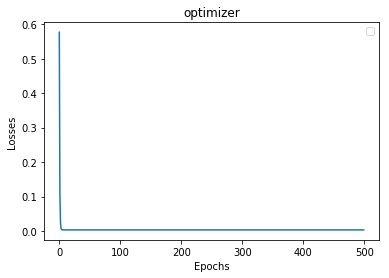

In [13]:
# Plot the accuracy and cost summaries
f, ax = plt.subplots()

ax.plot(history)    # GradientDescentOptimizer
ax.set_title('optimizer')

plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()

## 학습 데이터에 대한 정확도 확인 (학습 오차 확인)

In [14]:
y_from_nn = sess.run([Y2], feed_dict={X: xtrain})

for y_nn, y_real in zip(y_from_nn[0], ytrain):
    err = abs(y_nn[0] - y_real) / y_real * 100
    print('%.2f  %.2f 오차율 %.2f %%' % (y_nn[0], y_real, err))
    

4.13  4.12 오차율 0.29 %
4.43  4.50 오차율 1.68 %
5.61  5.55 오차율 1.22 %
5.94  5.89 오차율 0.92 %
6.65  6.62 오차율 0.49 %
7.21  7.17 오차율 0.59 %
8.00  8.07 오차율 0.79 %
8.18  8.12 오차율 0.69 %
8.32  8.40 오차율 0.98 %
8.33  8.36 오차율 0.45 %
10.30  10.26 오차율 0.36 %
11.26  11.34 오차율 0.68 %
11.28  11.34 오차율 0.49 %
12.07  12.03 오차율 0.33 %
12.16  12.22 오차율 0.49 %
12.19  12.26 오차율 0.52 %
12.36  12.29 오차율 0.56 %
12.72  12.66 오차율 0.52 %
13.63  13.61 오차율 0.16 %
14.78  14.76 오차율 0.13 %


## 테스트 데이터로 해보기

In [15]:
x_unseen = [random.random() * XVALUE for i in range(NUM_DATA)]
x_unseen = np.array(x_unseen).reshape((NUM_DATA, 1))

y_unseen = sess.run([Y2], feed_dict={X: x_unseen})

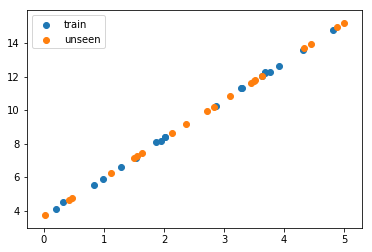

In [16]:
fig, ax = plt.subplots()
ax.scatter(xtrain, ytrain, label='train')
ax.scatter(x_unseen, y_unseen, label='unseen')

ax.legend()
plt.show()